Make sure you pick a GPU accelerator in the menu Edit->Settings

# 0. Download packages

In [1]:
!pip install -q git+https://github.com/p-sin/text2nca.git
!pip install -q git+https://github.com/google-research/self-organising-systems
!pip install -q git+https://github.com/patil-suraj/vqgan-jax.git
!pip install -q dalle-mini
!pip install -q ml_collections

     |████████████████████████████████| 202 kB 3.2 MB/s 
     |████████████████████████████████| 4.7 MB 51.2 MB/s 
     |████████████████████████████████| 217 kB 64.2 MB/s 
     |████████████████████████████████| 145 kB 68.8 MB/s 
     |████████████████████████████████| 596 kB 56.7 MB/s 
     |████████████████████████████████| 7.5 MB 5.3 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 
     |████████████████████████████████| 76 kB 5.6 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
     |████████████████████████████████| 6.6 MB 21.9 MB/s 
     |████████████████████████████████| 197 kB 6.2 MB/s 
     |████████████████████████████████| 235 kB 61.6 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.8 MB 55.1 MB/s 
     |████████████████████████████████| 181 kB 69.6 MB/s 
     |████████████████████████████████| 157 kB 65.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |███████████████████

Execute the following cell to find out what GPU you got allocated:

In [2]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-6e10400d-d443-2979-a124-ee93ddcbe38a)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

# 1. Choose a texture provider

Note: To download the Dall-E Mini model, you may need to get a (free) api key from wandb.ai.

In [5]:
import sys
from text2nca import available_providers

print("Pick a provider to source images from")
print("Choices are:")
for i, provider in enumerate(available_providers):
  print(str(i) + ". " + provider.__name__)

provider = None
choice = input()
if not choice.isnumeric():
  print("Error: Must be integer")
elif int(choice) < 0 or int(choice) >= len(available_providers):
  print("Error: Integer out of range")
else:
  provider = available_providers[int(choice)]()

Pick a provider to source images from
Choices are:
0. DallEMini
1. FreeStockTextures
1


# 2. Enter a prompt

In [6]:
prompt = input("Enter some keyword to search for: ")
images = provider.get_image(prompt)

Enter some keyword to search for: wood texture


# 3. Pick an image

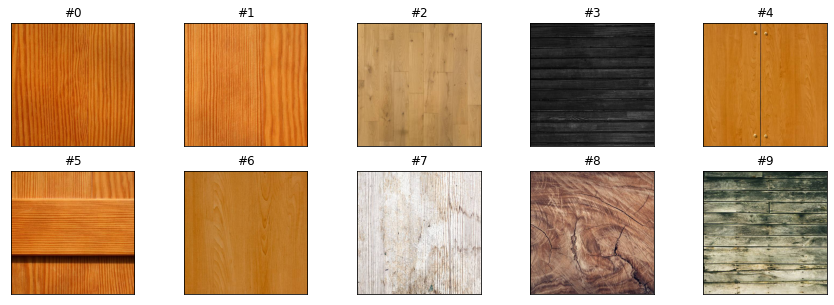

In [7]:
from math import ceil

fig = plt.figure(figsize=(15, 5))
columns = 4
rows = 5

ax = []
for i, image in enumerate(images):
    ax.append(fig.add_subplot(ceil(len(images)/5), min(len(images), 5), i+1))
    ax[-1].set_title("#"+str(i)) 
    
    # Hide grid lines
    ax[-1].grid(False)

    # Hide axes ticks
    ax[-1].set_xticks([])
    ax[-1].set_yticks([])
    plt.imshow(image)

plt.show() 


Pick an image by entering the number: 2


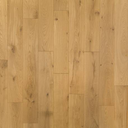

In [8]:
image_choice = input("Pick an image by entering the number: ")

if not image_choice.isnumeric():
  print("Error: Must be integer")
elif int(image_choice) < 0 or int(image_choice) >= len(images):
  print("Error: Integer out of range")
else:
  image = images[int(image_choice)]
  image.thumbnail((128, 128), Image.ANTIALIAS)
  display(image)

# 4. Train the NCA

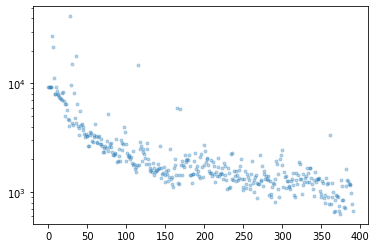

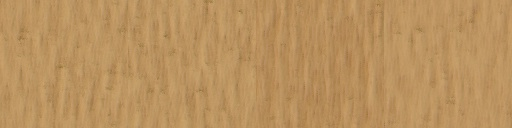

 391 666.02356

In [ ]:
from text2nca.nca.texturenca import TextureNCA
nca = TextureNCA()
nca.train("nca", image)